In [1]:
%config Completer.use_jedi = False

import configparser
config = configparser.ConfigParser()
config.read('agg-config.txt')


time_step = int(config.get('Configuration', 'time_step'))
time_step2 = int(config.get('Configuration', 'time_step2'))

window_size = int(config.get('Configuration', 'window_size'))
processed_data_folder = config.get('Configuration', 'processed_data_folder')

ini_date = config.get('Configuration', 'ini_date')
end_date = config.get('Configuration', 'end_date')

users=config.get('Configuration', 'users')
users = [(item.strip()) for item in users.split(',')]

activities=config.get('Configuration', 'activities')
activities = [(item.strip()) for item in activities.split(',')]

val0 = float(config.get('Configuration', 'social_val0'))
ftw_f1 = config.get('Configuration', 'social_ftw')
ftw_f1 = [float(item.strip()) for item in ftw_f1.split(',')]
cut0 = float(config.get('Configuration', 'social_cut0'))

In [2]:
import numpy as np
from pandas import read_csv    
import pandas as pd
import time

from datetime import datetime

off_zone=60*60*2

def day_time(ti):
    return int((int)((ti+off_zone)/(60*60*24)))


def time2str(tt):
    return datetime.fromtimestamp(tt).strftime("%Y-%m-%d %H:%M:%S")

tN = (int)(datetime.strptime(end_date, '%Y-%m-%d %H:%M:%S').timestamp())
print (end_date,"End date is", tN, "day:",day_time(tN), time2str(tN))


print(ini_date)
t0 = (int)(datetime.strptime(ini_date, '%Y-%m-%d %H:%M:%S').timestamp())
print (ini_date,"Init date is", t0, "day:",day_time(t0), time2str(t0))


def day_time0(ti):
    return day_time(ti)-day_time(t0)+1

def relT(ti):
    return (int)((ti-t0)/time_step)

def sizeT():
    return relT(tN) 

def absT(tt):
    return (int)(tt*time_step2+t0)

day=list(range(day_time(t0),day_time(tN)+1))[0]

nT=(int)(round(((tN-time_step2)-(t0+time_step2))/time_step2))
print(nT)

user_color={}
for user in users:
    user_color[user]=config.get('Colors', user)
print(user_color)

2024-07-8 01:59:59 End date is 1720396799 day: 19912 2024-07-08 01:59:59
2024-07-7 02:00:00
2024-07-7 02:00:00 Init date is 1720310400 day: 19911 2024-07-07 02:00:00
1438
{'ed9c': 'green', '0001': 'blue', '3d57': 'red'}


In [3]:
def intervals(s):
    ret = []
    lastV = 0
    lastI = -1
    for t in range(0, len(s)):

        if lastV >= val0 and s[t] < val0:
            #print("Interval end at index",t,"degree: ", s[t])
            ret.append((lastI, t - 1))
        if lastV < val0 and s[t] >= val0:
            #print("Interval start at index",t,"degree: ", s[t])
            lastI = t
        lastV = s[t]
    
    if lastV >= val0:
        ret.append((lastI, len(s) - 1))
    print(ret)
    return ret

In [4]:

def FTW_f(s,ftw_f):
    s2=np.zeros(len(s))
    for t in range(0,nT):
        s2[t]=0
        for incT in range(0, len(ftw_f)):
            if(t+incT>=(len(s))):
                continue
            s2[t]=max(s2[t],min(s[t+incT],ftw_f[incT]))
    return s2
def FTW_p(s,ftw_f):
    s2=np.zeros(len(s))
    for t in range(0,nT):
        s2[t]=0
        for incT in range(0, len(ftw_f)):
            if(t-incT<0):
                continue
            s2[t]=max(s2[t],min(s[t-incT],ftw_f[incT]))
    return s2

def FTW_sensor(s,ftw_f):
    sp=FTW_p(s,ftw_f)
    sf=FTW_f(s,ftw_f)
    s2=np.zeros(len(s))
    for t in range(0,nT):
        if(sp[t]==0 and sf[t]==0):
            s2[t]
        else:
            s2[t]=min(sp[t],sf[t])
    return s2


In [5]:
def printSensorMatrix(Ss, pair, i):
    df = pd.DataFrame()
    ts = []
    for t in range(t0 + time_step2, tN - time_step2, time_step2):
        ts.append(datetime.fromtimestamp(t))
    df['Time'] = ts
    df['Value'] = Ss.flatten()  # Flatten the array to ensure it's 1D
    
    fig, ax = plt.subplots(figsize=(15, 3))
    
    ax.bar(df['Time'], df['Value'], label=f"{pair[0]} - {pair[1]}", width=0.001)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    plt.xticks(rotation=45)
        
    ax.legend()
    ax.set_ylim(0, 1)
    ax.set_xlabel("Time")
    ax.set_ylabel("Value")
    
    plt.show()

1438
[0.0 0.0 0.0 ... 0.0651162790697674 0.0314465408805031 0.0472440944881889]
(1438,)


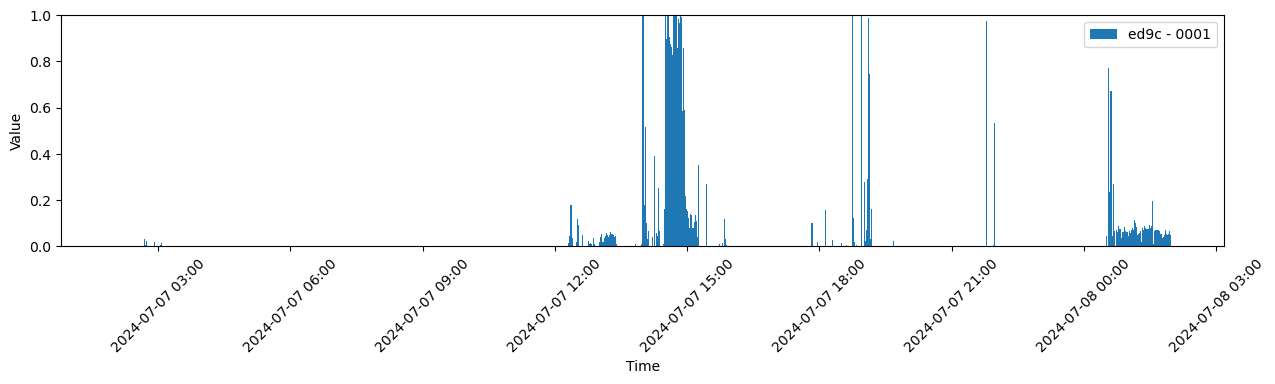

[(718, 719), (722, 722), (749, 775), (1004, 1004), (1016, 1016), (1026, 1027), (1186, 1186), (1198, 1198), (1352, 1353), (1356, 1356)]
PAIR ('ed9c', '0001') number of time intervals 10
[(718, 722), (749, 775), (1004, 1004), (1016, 1016), (1021, 1021), (1026, 1027), (1186, 1186), (1198, 1198), (1352, 1356)]
PAIR ('ed9c', '0001') number of fuzzy time intervals 9
Evaluating socialisation of ('ed9c', '0001')
./data-har/DAY_19911\ed9c.0001.interval.tsv
[(718, 722), (749, 775), (1004, 1004), (1016, 1016), (1021, 1021), (1026, 1027), (1186, 1186), (1198, 1198), (1352, 1356)]
	 Interval (718, 722) 2024-07-07 13:58:00 2024-07-07 14:02:00
	 Interval (749, 775) 2024-07-07 14:29:00 2024-07-07 14:55:00
	 Interval (1004, 1004) 2024-07-07 18:44:00 2024-07-07 18:44:00
	 Interval (1016, 1016) 2024-07-07 18:56:00 2024-07-07 18:56:00
	 Interval (1021, 1021) 2024-07-07 19:01:00 2024-07-07 19:01:00
	 Interval (1026, 1027) 2024-07-07 19:06:00 2024-07-07 19:07:00
	 Interval (1186, 1186) 2024-07-07 21:46:00 2

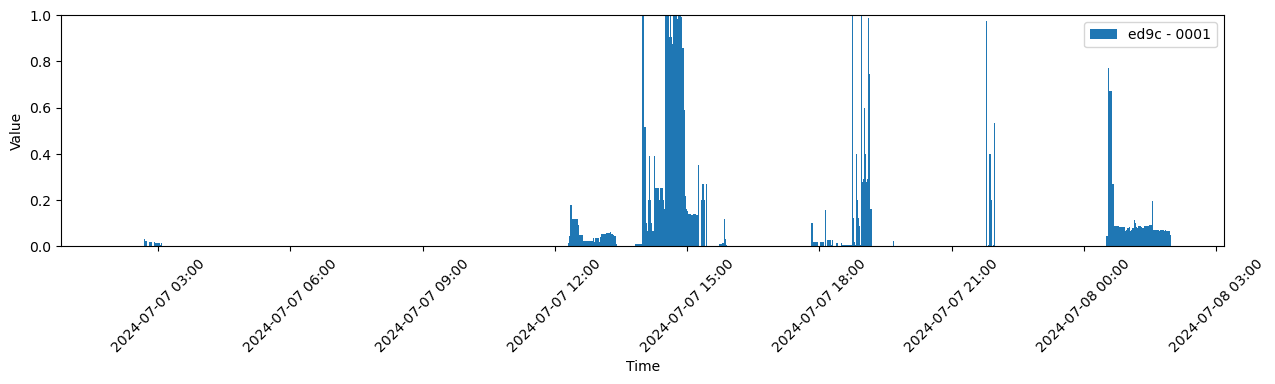

1438
[0.0 0.0 0.0 ... 0.0787037037037037 0.043859649122807 0.0930232558139534]
(1438,)


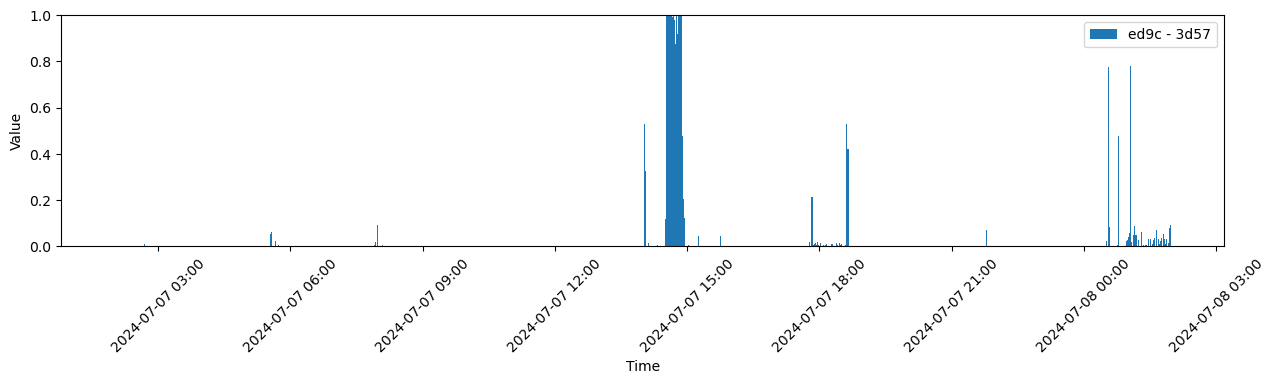

[(721, 721), (751, 772), (996, 996), (1352, 1353), (1382, 1382)]
PAIR ('ed9c', '3d57') number of time intervals 5
[(721, 721), (751, 772), (996, 996), (1352, 1353), (1382, 1382)]
PAIR ('ed9c', '3d57') number of fuzzy time intervals 5
Evaluating socialisation of ('ed9c', '3d57')
./data-har/DAY_19911\ed9c.3d57.interval.tsv
[(721, 721), (751, 772), (996, 996), (1352, 1353), (1382, 1382)]
	 Interval (721, 721) 2024-07-07 14:01:00 2024-07-07 14:01:00
	 Interval (751, 772) 2024-07-07 14:31:00 2024-07-07 14:52:00
	 Interval (996, 996) 2024-07-07 18:36:00 2024-07-07 18:36:00
	 Interval (1352, 1353) 2024-07-08 00:32:00 2024-07-08 00:33:00
	 Interval (1382, 1382) 2024-07-08 01:02:00 2024-07-08 01:02:00


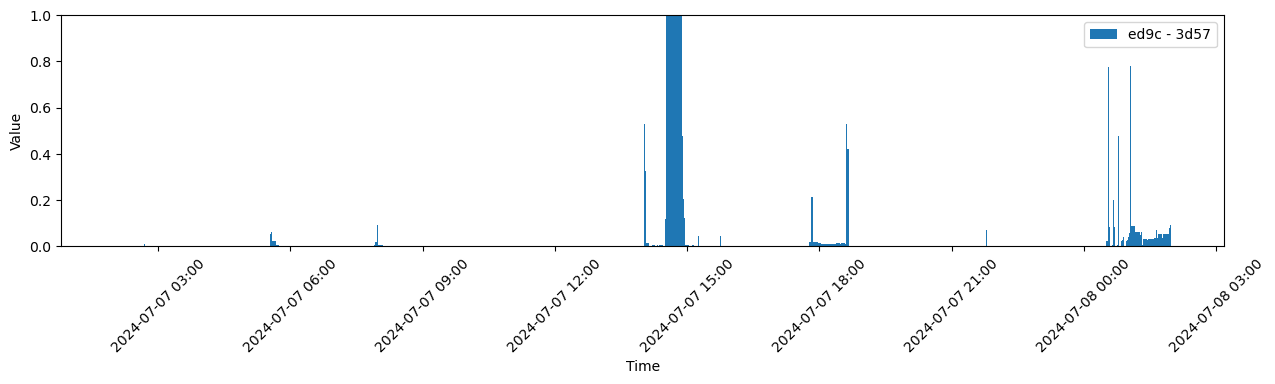

1438
[0.0 0.0 0.0 ... 0.0059171597633136 0.0043859649122807 0.0093023255813953]
(1438,)


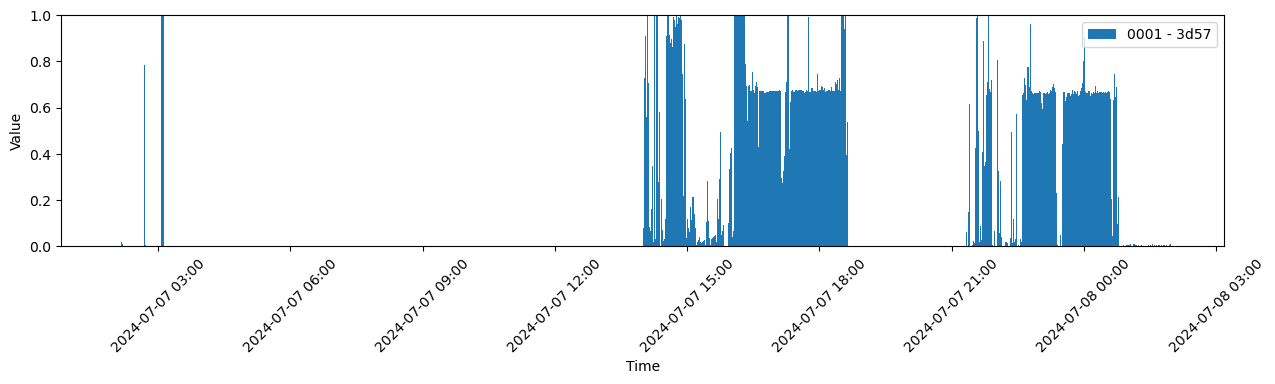

[(40, 40), (64, 66), (721, 726), (734, 735), (737, 739), (741, 741), (751, 773), (776, 777), (843, 875), (878, 906), (913, 917), (920, 944), (946, 995), (997, 997), (1163, 1163), (1173, 1175), (1183, 1183), (1187, 1193), (1202, 1202), (1227, 1227), (1236, 1281), (1291, 1355), (1359, 1363)]
PAIR ('0001', '3d57') number of time intervals 23
[(40, 40), (64, 66), (721, 726), (729, 731), (734, 741), (746, 746), (751, 777), (843, 906), (908, 911), (913, 997), (1163, 1163), (1168, 1168), (1173, 1175), (1178, 1180), (1183, 1193), (1197, 1198), (1202, 1202), (1227, 1227), (1231, 1232), (1236, 1281), (1286, 1286), (1291, 1363)]
PAIR ('0001', '3d57') number of fuzzy time intervals 22
Evaluating socialisation of ('0001', '3d57')
./data-har/DAY_19911\0001.3d57.interval.tsv
[(40, 40), (64, 66), (721, 726), (729, 731), (734, 741), (746, 746), (751, 777), (843, 906), (908, 911), (913, 997), (1163, 1163), (1168, 1168), (1173, 1175), (1178, 1180), (1183, 1193), (1197, 1198), (1202, 1202), (1227, 1227), 

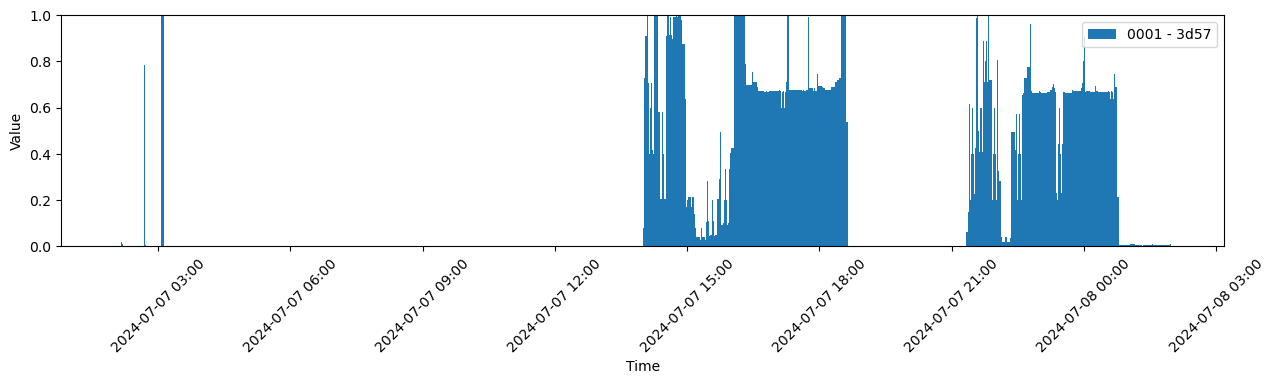

In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from itertools import combinations
from math import comb

pairs = list(combinations(users, 2)) 
combs = len(pairs)  



for i, pair in enumerate(pairs):
    S = np.zeros((1, nT))
    
    file_path = os.path.join(processed_data_folder, f"DAY_{day}", f"{pair[0]}.{pair[1]}.tsv")
    
    if os.path.exists(file_path):
        series = pd.read_csv(file_path, sep="\t", parse_dates=True, header=None)
        print(len(series.values[:, 1]))
        S = np.array(series.values[:,[1]]).flatten() 
        print(S)
    else:
        print(f"File {file_path} does not exist. Skipping pair {pair}.")
        continue

    print(S.shape)

    printSensorMatrix(S, pair, i)
    
    print("PAIR", pair, "number of time intervals", len(intervals(S)))
    S = FTW_sensor(S, ftw_f1)
    print("PAIR", pair, "number of fuzzy time intervals", len(intervals(S)))

    I = np.zeros((len(users), combs, nT))

    print("Evaluating socialisation of", pair)

    filepath = os.path.join(processed_data_folder, f"DAY_{day}", f"{pair[0]}.{pair[1]}.interval.tsv")
    print(filepath)

    with open(filepath, "w") as f:
        for ii in intervals(S):
            degree = np.mean(S[ii[0]:ii[1]+1])
            print("\t Interval", ii, datetime.fromtimestamp(absT(ii[0])).strftime("%Y-%m-%d %H:%M:%S"), datetime.fromtimestamp(absT(ii[1])).strftime("%Y-%m-%d %H:%M:%S"))
            if degree >= cut0:
                f.write(f"{ii}\t{datetime.fromtimestamp(absT(ii[0])).strftime('%Y-%m-%d %H:%M:%S')}\t{datetime.fromtimestamp(absT(ii[1])).strftime('%Y-%m-%d %H:%M:%S')}\t")
                f.write(f"{str(degree).replace('.', ',')}\n")

    printSensorMatrix(S, pair, i)
